In [1]:
# Simulation of the scintillation quenching

In [2]:
pip install TDCRPy --upgrade

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.5 MB 330.3 kB/s eta 0:01:15
   ---------------------------------------- 0.0/24.5 MB 393.8 kB/s eta 0:01:03
   ---------------------------------------- 0.1/24.5 MB 819.2 kB/s eta 0:00:30
   - -------------------------------------- 1.0/24.5 MB 6.0 MB/s eta 0:00:04
   - -------------------------------------- 1.0/24.5 MB 6.0 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/24.5 MB 8.3 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/24.5 MB 8.3 MB/s eta 0:00:03
   ----- ---------------------------------- 3.1/24.5 MB 8.4 MB/s eta 0:00:03
   ----- ---------------------------------- 3.1/24.5 MB 8.4 MB/s eta 0:00:03
   ------ --------------------------------- 3.9/24.5 MB 8.4 MB/s eta 0:00:03
   ------ --------------------------------- 4.2/24.5 MB 8.9 MB/s eta 0:00:03

In [3]:
import tdcrpy as td
import matplotlib.pyplot as plt
import numpy as np

## Calculate the quenched energy from the Birks model

In [4]:
kB = 0.01 # Birks constant in cm/MeV
ei = 1000  # initial energy in keV
ed = 1000  # deposited energy in keV
nE = 10000  # number of points of the energy linear space
eq_e=td.TDCR_model_lib.E_quench_e(ei*1e3,ed*1e3,kB,nE)*1e-3
print(f"For electrons       => Initial energy = {ei} keV, deposited energy = {ed} keV, quenched energy = {eq_e:.5g} keV")
eq_a=td.TDCR_model_lib.E_quench_a(ei,kB*1e-3,nE)
print(f"For alpha particles => Initial energy = {ei} keV, quenched energy = {eq_a:.5g} keV")

For electrons       => Initial energy = 1000 keV, deposited energy = 1000 keV, quenched energy = 975.24 keV
For alpha particles => Initial energy = 1000 keV, quenched energy = 48.934 keV


## Correction of the micelle effect

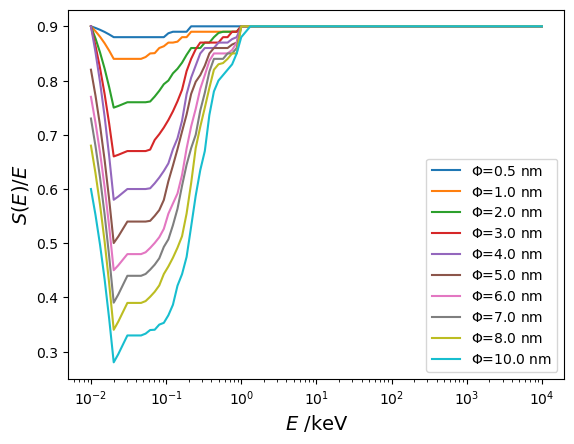

In [7]:
energy_vec = np.logspace(-2,4,100) # in keV
fAq=0.1
s05, s1, s2, s3, s4, s5, s6, s7, s8, s10 = [], [], [], [], [], [], [], [], [], []
for e in energy_vec:
    s05.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=0.5))
    s1.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=1.0))
    s2.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=2.0))
    s3.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=3.0))
    s4.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=4.0))
    s5.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=5.0))
    s6.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=6.0))
    s7.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=7.0))
    s8.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=8.0))
    s10.append(td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=10.0))

plt.figure("Deposited energy ratio")
plt.clf()
plt.plot(energy_vec,s05,label="$\Phi$=0.5 nm")
plt.plot(energy_vec,s1,label="$\Phi$=1.0 nm")
plt.plot(energy_vec,s2,label="$\Phi$=2.0 nm")
plt.plot(energy_vec,s3,label="$\Phi$=3.0 nm")
plt.plot(energy_vec,s4,label="$\Phi$=4.0 nm")
plt.plot(energy_vec,s5,label="$\Phi$=5.0 nm")
plt.plot(energy_vec,s6,label="$\Phi$=6.0 nm")
plt.plot(energy_vec,s7,label="$\Phi$=7.0 nm")
plt.plot(energy_vec,s8,label="$\Phi$=8.0 nm")
plt.plot(energy_vec,s10,label="$\Phi$=10.0 nm")
plt.xscale('log')
plt.xlabel(r'$E$ /keV', fontsize=14)
plt.ylabel(r'$S(E)/E$', fontsize=14)
plt.legend()

## Scintillation quenching function from the Birks model (with micelle effect)

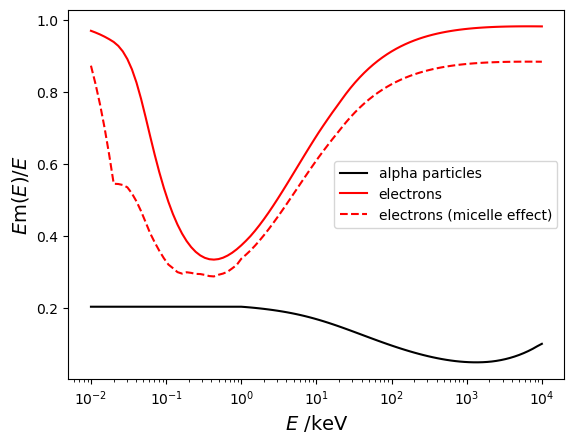

In [6]:
energy_vec = np.logspace(-2,4,100) # in keV
fAq = 0.1 # acqueous fraction
diam_micelle = 4.0 # diameter of micelles (in nm) 

eq_a, eq_e, eq_e_m = [], [], []
for e in energy_vec:
        eq_e.append(td.TDCR_model_lib.E_quench_e(e*1e3,e*1e3,kB,nE)*1e-3)
        eq_e_m.append(td.TDCR_model_lib.E_quench_e(e*1e3,e*1e3,kB,nE)*1e-3*td.TDCR_model_lib.micelleLoss(e,fAq=fAq,diam_micelle=diam_micelle))
        eq_a.append(td.TDCR_model_lib.E_quench_a(e,kB*1e-3,nE))

plt.figure("Quenched Energy")
plt.clf()
plt.plot(energy_vec,eq_a/energy_vec,"-k",label="alpha particles")
plt.plot(energy_vec,eq_e/energy_vec,"-r",label="electrons")
plt.plot(energy_vec,eq_e_m/energy_vec,"--r",label="electrons (micelle effect)")
plt.xscale('log')
plt.xlabel(r'$E$ /keV', fontsize=14)
plt.ylabel(r'$E$m$(E)/E$', fontsize=14)
plt.legend()